# Alumno: Gerardo de Miguel González

## NumPy: Data statistics

The data in [populations.txt](http://scipy-lectures.github.io/_downloads/populations.txt) describes the populations of hares and lynxes (and carrots) in northern Canada during 20 years.

Computes and print, based on the data in `populations.txt` (use loadtxt to read the file)...

  1. The mean and std of the populations of each species for the years in the period.
  2. Which year each species had the largest population.
  3. Which species has the largest population for each year. (Hint: argsort & fancy indexing of np.array(['H', 'L', 'C']))
  4. Which years any of the populations is above 50000. (Hint: comparisons and np.any)
  5. The top 2 years for each species when they had the lowest populations. (Hint: argsort, fancy indexing)
  6. Compare (plot) the change in hare population (see help(np.gradient)) and the number of lynxes. Check correlation (see help(np.corrcoef)).

... all without for-loops.

In [0]:
#::GMG::We need the usual import here :)
import numpy as np
import matplotlib.pyplot as plt

### 0. Loading data

In [0]:
#::GMG::I'm going to get the data first, of course
# https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.DataSource.html
ds = np.DataSource(None)
location = 'http://scipy-lectures.github.io/_downloads/populations.txt'


In [3]:
# https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.loadtxt.html
rfile = ds.open(location)
data = np.loadtxt(rfile)
#::GMG::We've got the numpy 2D array (matrix) data but don't know the
#       meaning of each column unless we take a look at the txt source
#       file that has a first skipped line mark as comment:
#       year	hare	lynx	carrot
print(type(data))
data

<class 'numpy.ndarray'>


array([[ 1900., 30000.,  4000., 48300.],
       [ 1901., 47200.,  6100., 48200.],
       [ 1902., 70200.,  9800., 41500.],
       [ 1903., 77400., 35200., 38200.],
       [ 1904., 36300., 59400., 40600.],
       [ 1905., 20600., 41700., 39800.],
       [ 1906., 18100., 19000., 38600.],
       [ 1907., 21400., 13000., 42300.],
       [ 1908., 22000.,  8300., 44500.],
       [ 1909., 25400.,  9100., 42100.],
       [ 1910., 27100.,  7400., 46000.],
       [ 1911., 40300.,  8000., 46800.],
       [ 1912., 57000., 12300., 43800.],
       [ 1913., 76600., 19500., 40900.],
       [ 1914., 52300., 45700., 39400.],
       [ 1915., 19500., 51100., 39000.],
       [ 1916., 11200., 29700., 36700.],
       [ 1917.,  7600., 15800., 41800.],
       [ 1918., 14600.,  9700., 43300.],
       [ 1919., 16200., 10100., 41300.],
       [ 1920., 24700.,  8600., 47300.]])

In [4]:
#::GMG::There's an alternative to read the data creating a view like
#       a column named matrix give that the columns are homogeneous
# https://stackoverflow.com/questions/24143807/load-csv-file-to-numpy-and-access-columns-by-name/24144773#24144773
# https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.genfromtxt.html
rfile = ds.open(location)
dataset = np.genfromtxt(rfile, 
                        delimiter='\t', 
                        names=['Year','Hare', 'Lynx', 'Carrot'])
print(dataset.shape)
print(dataset)
print('Year column:', dataset['Year'])
print('Carrot column:', dataset['Carrot'])

(21,)
[(1900., 30000.,  4000., 48300.) (1901., 47200.,  6100., 48200.)
 (1902., 70200.,  9800., 41500.) (1903., 77400., 35200., 38200.)
 (1904., 36300., 59400., 40600.) (1905., 20600., 41700., 39800.)
 (1906., 18100., 19000., 38600.) (1907., 21400., 13000., 42300.)
 (1908., 22000.,  8300., 44500.) (1909., 25400.,  9100., 42100.)
 (1910., 27100.,  7400., 46000.) (1911., 40300.,  8000., 46800.)
 (1912., 57000., 12300., 43800.) (1913., 76600., 19500., 40900.)
 (1914., 52300., 45700., 39400.) (1915., 19500., 51100., 39000.)
 (1916., 11200., 29700., 36700.) (1917.,  7600., 15800., 41800.)
 (1918., 14600.,  9700., 43300.) (1919., 16200., 10100., 41300.)
 (1920., 24700.,  8600., 47300.)]
Year column: [1900. 1901. 1902. 1903. 1904. 1905. 1906. 1907. 1908. 1909. 1910. 1911.
 1912. 1913. 1914. 1915. 1916. 1917. 1918. 1919. 1920.]
Carrot column: [48300. 48200. 41500. 38200. 40600. 39800. 38600. 42300. 44500. 42100.
 46000. 46800. 43800. 40900. 39400. 39000. 36700. 41800. 43300. 41300.
 47300.]


In [5]:
#::GMG::So as we stil don't know that pandas exists ... :)
#       we have to hardwire the data columns into numpy
#       arrays with multiple assignment, turning every column into
#       a row ...
years, hares, lynxes, carrots = np.transpose(data)
#display(type(year), type(hares), type(lynxes), type(carrots))
print('hares:',hares)

hares: [30000. 47200. 70200. 77400. 36300. 20600. 18100. 21400. 22000. 25400.
 27100. 40300. 57000. 76600. 52300. 19500. 11200.  7600. 14600. 16200.
 24700.]


### 1. The mean and std of the populations of each species for the years in the period.

::GMG::References used here

 - [SciPy: Numpy Statistics](https://docs.scipy.org/doc/numpy-1.15.0/reference/routines.statistics.html)
 - [TutorialsPoint: NumPy - Statistical Functions](https://www.tutorialspoint.com/numpy/numpy_statistical_functions.htm)
 - [Introduction to statistics using Numpy](https://mubaris.com/posts/statistics/)
 
::GMG::Also seen these ones
 
 - Python Standard Library [statistics — Mathematical statistics functions](https://docs.python.org/3/library/statistics.html)
 - SciPy: Statistical functions ([scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html))
 - TutorialsPoint: [SciPy - Stats](https://www.tutorialspoint.com/scipy/scipy_stats.htm)

In [6]:
#::GMG:: Using NumPy's built-in functions to Find (sample) Mean and 
#        (sample) SD and slicing data 2D numpy array with [:,:]
sample_mean = np.mean(data[:,1:],axis = 0)
# np.apply_along_axis(np.mean, 0, data[:,1:])
sample_sd = np.std(data[:,1:], axis = 0)
# np.apply_along_axis(np.std, 0, data[:,1:])

#::GMG::Printing the values
print("Sample Mean Array:", sample_mean) 
print("Sample Standard Deviation Array:", sample_sd) 

Sample Mean Array: [34080.95238095 20166.66666667 42400.        ]
Sample Standard Deviation Array: [20897.90645809 16254.59153691  3322.50622558]


In [7]:
#::GMG::We could also do it species by species if need be ...
sample_mean_hares = np.mean(hares)
print("Sample Mean Hares:", sample_mean_hares)
sample_sd_hares = np.std(hares)
print("Sample Standard Deviation Hares:", sample_sd_hares)

Sample Mean Hares: 34080.95238095238
Sample Standard Deviation Hares: 20897.906458089667


In [8]:
#::GMG::Using the "alternative" dataset we can also do it by
#       species
sample_mean_hares_alt = np.mean(dataset['Hare'])
print("Sample Mean Array:", sample_mean_hares_alt)

Sample Mean Array: 34080.95238095238


In [9]:
#::GMG::But I Don't know how to appply the np.mean() or np.std() to
#       this "array" (?)
# sample_mean = np.mean(dataset[['Hare','Lynx','Carrot']],axis = 0)
# TypeError: cannot perform reduce with flexible type
dataset[['Hare','Lynx','Carrot']]

array([(30000.,  4000., 48300.), (47200.,  6100., 48200.),
       (70200.,  9800., 41500.), (77400., 35200., 38200.),
       (36300., 59400., 40600.), (20600., 41700., 39800.),
       (18100., 19000., 38600.), (21400., 13000., 42300.),
       (22000.,  8300., 44500.), (25400.,  9100., 42100.),
       (27100.,  7400., 46000.), (40300.,  8000., 46800.),
       (57000., 12300., 43800.), (76600., 19500., 40900.),
       (52300., 45700., 39400.), (19500., 51100., 39000.),
       (11200., 29700., 36700.), ( 7600., 15800., 41800.),
       (14600.,  9700., 43300.), (16200., 10100., 41300.),
       (24700.,  8600., 47300.)],
      dtype=[('Hare', '<f8'), ('Lynx', '<f8'), ('Carrot', '<f8')])

### 2. Which year each species had the largest population.



In [10]:
#::GMG::Remember what I've got
features = np.array(['Year','Hare','Lynx','Carrot'])
display('features:',features,
        'loadtxt data:',data, 
        'genfromtxt dataset:', dataset
       )

'features:'

array(['Year', 'Hare', 'Lynx', 'Carrot'], dtype='<U6')

'loadtxt data:'

array([[ 1900., 30000.,  4000., 48300.],
       [ 1901., 47200.,  6100., 48200.],
       [ 1902., 70200.,  9800., 41500.],
       [ 1903., 77400., 35200., 38200.],
       [ 1904., 36300., 59400., 40600.],
       [ 1905., 20600., 41700., 39800.],
       [ 1906., 18100., 19000., 38600.],
       [ 1907., 21400., 13000., 42300.],
       [ 1908., 22000.,  8300., 44500.],
       [ 1909., 25400.,  9100., 42100.],
       [ 1910., 27100.,  7400., 46000.],
       [ 1911., 40300.,  8000., 46800.],
       [ 1912., 57000., 12300., 43800.],
       [ 1913., 76600., 19500., 40900.],
       [ 1914., 52300., 45700., 39400.],
       [ 1915., 19500., 51100., 39000.],
       [ 1916., 11200., 29700., 36700.],
       [ 1917.,  7600., 15800., 41800.],
       [ 1918., 14600.,  9700., 43300.],
       [ 1919., 16200., 10100., 41300.],
       [ 1920., 24700.,  8600., 47300.]])

'genfromtxt dataset:'

array([(1900., 30000.,  4000., 48300.), (1901., 47200.,  6100., 48200.),
       (1902., 70200.,  9800., 41500.), (1903., 77400., 35200., 38200.),
       (1904., 36300., 59400., 40600.), (1905., 20600., 41700., 39800.),
       (1906., 18100., 19000., 38600.), (1907., 21400., 13000., 42300.),
       (1908., 22000.,  8300., 44500.), (1909., 25400.,  9100., 42100.),
       (1910., 27100.,  7400., 46000.), (1911., 40300.,  8000., 46800.),
       (1912., 57000., 12300., 43800.), (1913., 76600., 19500., 40900.),
       (1914., 52300., 45700., 39400.), (1915., 19500., 51100., 39000.),
       (1916., 11200., 29700., 36700.), (1917.,  7600., 15800., 41800.),
       (1918., 14600.,  9700., 43300.), (1919., 16200., 10100., 41300.),
       (1920., 24700.,  8600., 47300.)],
      dtype=[('Year', '<f8'), ('Hare', '<f8'), ('Lynx', '<f8'), ('Carrot', '<f8')])

In [11]:
#::GMG::I can slice the individual features ...
display('Years:',dataset['Year'], 
        'Hares:',dataset['Hare'], 
        'Lynxes:',dataset['Lynx'], 
        'Carrots',dataset['Carrot'])
# ... and have objects (np.arrays)  that hold those features
display('Years:',years, 
        'Hares:',hares, 
        'Lynxes:',lynxes, 
        'Carrots',carrots)

'Years:'

array([1900., 1901., 1902., 1903., 1904., 1905., 1906., 1907., 1908.,
       1909., 1910., 1911., 1912., 1913., 1914., 1915., 1916., 1917.,
       1918., 1919., 1920.])

'Hares:'

array([30000., 47200., 70200., 77400., 36300., 20600., 18100., 21400.,
       22000., 25400., 27100., 40300., 57000., 76600., 52300., 19500.,
       11200.,  7600., 14600., 16200., 24700.])

'Lynxes:'

array([ 4000.,  6100.,  9800., 35200., 59400., 41700., 19000., 13000.,
        8300.,  9100.,  7400.,  8000., 12300., 19500., 45700., 51100.,
       29700., 15800.,  9700., 10100.,  8600.])

'Carrots'

array([48300., 48200., 41500., 38200., 40600., 39800., 38600., 42300.,
       44500., 42100., 46000., 46800., 43800., 40900., 39400., 39000.,
       36700., 41800., 43300., 41300., 47300.])

'Years:'

array([1900., 1901., 1902., 1903., 1904., 1905., 1906., 1907., 1908.,
       1909., 1910., 1911., 1912., 1913., 1914., 1915., 1916., 1917.,
       1918., 1919., 1920.])

'Hares:'

array([30000., 47200., 70200., 77400., 36300., 20600., 18100., 21400.,
       22000., 25400., 27100., 40300., 57000., 76600., 52300., 19500.,
       11200.,  7600., 14600., 16200., 24700.])

'Lynxes:'

array([ 4000.,  6100.,  9800., 35200., 59400., 41700., 19000., 13000.,
        8300.,  9100.,  7400.,  8000., 12300., 19500., 45700., 51100.,
       29700., 15800.,  9700., 10100.,  8600.])

'Carrots'

array([48300., 48200., 41500., 38200., 40600., 39800., 38600., 42300.,
       44500., 42100., 46000., 46800., 43800., 40900., 39400., 39000.,
       36700., 41800., 43300., 41300., 47300.])

In [12]:
#::GMG::Canonical solution - find the indexes of the max value per
#       species --> dataset[features[1:]] or data[:,1:]
# https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.argmax.html
# Returns the indices of the maximum values along an axis.
max_index = np.argmax(data[:,1:],axis = 0)
# https://stackoverflow.com/questions/31683959/the-zip-function-in-python-3
print ('Largest populations:\n', 
       list(zip(features[1:], years[max_index].astype(np.int64))))

Largest populations:
 [('Hare', 1903), ('Lynx', 1904), ('Carrot', 1900)]


In [13]:
#::GMG::I could also try applying np.argmax to dataset[features[1:]] 
#       but it cannot be "reduced" ...
# https://stackoverflow.com/questions/43442415/cannot-perform-reduce-with-flexible-type
#       (I don't understand completely this yet)
#       so I can only get the indexes by feature, i.e. one by one
display(max_index,
        np.apply_along_axis(np.argmax, 0, dataset[features[1]]),
        np.argmax(dataset[features[1]],axis = 0)
       )

array([3, 4, 0])

array(3)

3

### 3. Which species has the largest population for each year. 

(*Hint*: argsort & fancy indexing of `np.array(['H', 'L', 'C'])`)

In [0]:
#::GMG::Now I have to work along the horzontal axis (=1) and I will get
#       20 indexes of the maximum value per row
max_index_feature = np.argmax(data[:,1:], axis = 1)

In [15]:
#::GMG::Then I have only to print a list of year and species ...
print ('Largest populations by year:\n', 
       *list(zip(
              years[max_index_feature].astype(np.int64),
              features[max_index_feature + 1]
               )
           )
      )
#::GMG::TODO::pretty print as a table these data
# https://docs.scipy.org/doc/numpy-1.15.1/user/basics.rec.html
# https://stackoverflow.com/questions/9535954/printing-lists-as-tabular-data

Largest populations by year:
 (1902, 'Carrot') (1902, 'Carrot') (1900, 'Hare') (1900, 'Hare') (1901, 'Lynx') (1901, 'Lynx') (1902, 'Carrot') (1902, 'Carrot') (1902, 'Carrot') (1902, 'Carrot') (1902, 'Carrot') (1902, 'Carrot') (1900, 'Hare') (1900, 'Hare') (1900, 'Hare') (1901, 'Lynx') (1902, 'Carrot') (1902, 'Carrot') (1902, 'Carrot') (1902, 'Carrot') (1902, 'Carrot')


### 4. Which years any of the populations is above 50000. 

(*Hint*: comparisons and `np.any`)

In [16]:
#::GMG:: I have a condition here so that's my indexing on data and I have
#        to check along the features axis (=1) by year and get the year
#        index where the condition is met
# https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.any.html
# https://stackoverflow.com/questions/40820779/how-to-use-numpy-all-or-numpy-any
index_year = np.any(data[:,1:] > 50000, axis=1)
print ('Years with any species above 50000:', years[index_year].astype(np.int64))

Years with any species above 50000: [1902 1903 1904 1912 1913 1914 1915]


### 5. The top 2 years for each species when they had the lowest populations. 

(*Hint*: `argsort`, fancy indexing)

In [17]:
#::GMG::I have to get year indexes again but now I have to get the lowest
#       values for each column (rank each species/axis = 0 by value) and
#       select the two worst ones (first and second in the index array) ...
# https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.argsort.html
#
index_year_worst_ones = np.argsort(data[:,1:], axis = 0)
#index_year_worst_ones
print ('Top 2 worst years for each species:\n', 
       years[index_year_worst_ones[:2]].astype(np.int64))
#::GMG::TODO - pretty print the table of species and years
# https://stackoverflow.com/questions/9535954/printing-lists-as-tabular-data

Top 2 worst years for each species:
 [[1917 1900 1916]
 [1916 1901 1903]]


### 6. Compare (plot) the change in hare population and the number of *lynxes*.

(see `help(np.gradient)` for change ...)  

Check correlation (see `help(np.corrcoef)`).

::GMG::References

 - [numpy.gradient](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.gradient.html)
 - [Stackoverflow: What does numpy.gradient do?](https://stackoverflow.com/questions/24633618/what-does-numpy-gradient-do)
 - [numpy.corrcoef](https://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html)
 - [Ben Alex Keen: Correlation in Python](http://benalexkeen.com/correlation-in-python/)
 - [Stackoverflow: Why does corrcoef return a matrix?](https://stackoverflow.com/questions/3425439/why-does-corrcoef-return-a-matrix)
 - [Matplotlib Gallery](https://matplotlib.org/gallery/)

In [18]:
#::GMG::I have to understand how to use the numpy functions
#       gradient() and corrcoef() AND matplotlib to be able to complete
#       this task
#::GMG::So change in hare population can be translated into gradient 
#       (derivative) in time with 1 year scale 
#
#::GMG::I have the hares series in a numpy array
print('hares count:',hares)
#::GMG::I do the derivative with 1 year spacing between values
change_hares = np.gradient(hares,1.0)
print('hare time gradient:',change_hares)

hares count: [30000. 47200. 70200. 77400. 36300. 20600. 18100. 21400. 22000. 25400.
 27100. 40300. 57000. 76600. 52300. 19500. 11200.  7600. 14600. 16200.
 24700.]
hare time gradient: [ 17200.  20100.  15100. -16950. -28400.  -9100.    400.   1950.   2000.
   2550.   7450.  14950.  18150.  -2350. -28550. -20550.  -5950.   1700.
   4300.   5050.   8500.]


In [19]:
#::GMG::Now I have to "compare" with the lynxes count (number) ... so I guess 
#       this is the "correlation thing" ...
print('lynxes count:',lynxes)
cor_hares_lynxes = np.corrcoef(change_hares, lynxes)
print('hare change and lynxes count correlation MATRIX:\n',cor_hares_lynxes)
#::GMG::I have a "correlation matrix" ... where element [0,1] is the value 
#       I'm looking for, i.e hare (change) vs lynx (count) correlation (!)
print('hare change and lynxes count correlation:\n',cor_hares_lynxes[0,1])


lynxes count: [ 4000.  6100.  9800. 35200. 59400. 41700. 19000. 13000.  8300.  9100.
  7400.  8000. 12300. 19500. 45700. 51100. 29700. 15800.  9700. 10100.
  8600.]
hare change and lynxes count correlation MATRIX:
 [[ 1.         -0.91792485]
 [-0.91792485  1.        ]]
hare change and lynxes count correlation:
 -0.9179248480315341


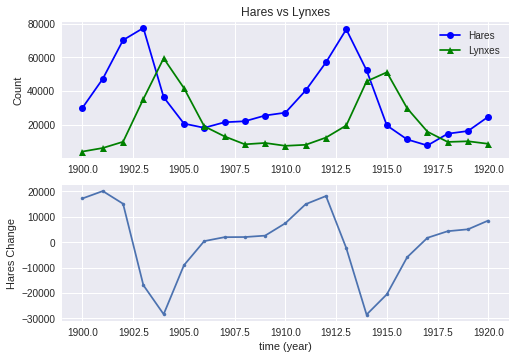

In [20]:
#::GMG::So I'm plotting things now ... the correlation coefficient is negative
#       which means that an increase of lynxes matches a decrease of hares
#       that is a typical prey-predator relationship
plt.subplot(2, 1, 1)
plt.plot(years.astype(np.int64),hares,'bo-')
plt.plot(years.astype(np.int64),lynxes,'g^-',)
plt.title('Hares vs Lynxes')
plt.ylabel('Count')
plt.legend(('Hares', 'Lynxes'), loc='upper right')

plt.subplot(2, 1, 2)
plt.plot(years.astype(np.int64),change_hares,'.-')
plt.ylabel('Hares Change')
plt.xlabel('time (year)')
plt.show()